In [28]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
#from keras.applications import MobileNet
from keras.preprocessing import image
#from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

In [29]:
img_height,img_width = 224,224
num_classes = 7
input_shape= (img_height,img_width,3)
base_model=ResNet50(weights='imagenet',include_top=False,input_shape= (img_height,img_width,3)) #imports the mobilenet model and discards the last 1000 neuron layer.

/home/thamizharasi/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [30]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(num_classes,activation='softmax')(x) #final layer with softmax activation


In [31]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [32]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [44]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [25]:
# import imutils
# from imutils import paths
# import cv2
# imagePaths = list(paths.list_images("./dataset"))

# basepath='./dataset2/'
# # loop over the image paths
# for (i, imagePath) in enumerate(imagePaths):
# 	# extract the person name from the image path
# 	print("[INFO] processing image {}/{}".format(i + 1,
# 		len(imagePaths)))
# 	dir1 = imagePath.split(os.path.sep)[-2]
# 	name = imagePath.split(os.path.sep)[-1]
# 	print(dir1)
# 	print(name)
# 	filename=basepath+dir1+'/'+name
# 	print(filename)
# 	# load the image, resize it to have a width of 600 pixels (while
# 	# maintaining the aspect ratio), and then grab the image
# 	# dimensions
# 	image = cv2.imread(imagePath)
# 	image = cv2.resize(image, (224,224),interpolation = cv2.INTER_AREA)
# 	cv2.imwrite(filename,image)
# 	print('file' +str(i)+ ' written')

[INFO] processing image 1/917
normal_intermediate
153956279-153956296-001.BMP
./dataset2/normal_intermediate/153956279-153956296-001.BMP
file0 written
[INFO] processing image 2/917
normal_intermediate
157222534-157222561-001.BMP
./dataset2/normal_intermediate/157222534-157222561-001.BMP
file1 written
[INFO] processing image 3/917
normal_intermediate
157268504-157268534-001.BMP
./dataset2/normal_intermediate/157268504-157268534-001.BMP
file2 written
[INFO] processing image 4/917
normal_intermediate
209522940-209523052-001.BMP
./dataset2/normal_intermediate/209522940-209523052-001.BMP
file3 written
[INFO] processing image 5/917
normal_intermediate
209522474-209522522-001.BMP
./dataset2/normal_intermediate/209522474-209522522-001.BMP
file4 written
[INFO] processing image 6/917
normal_intermediate
209565409-209565466-001.BMP
./dataset2/normal_intermediate/209565409-209565466-001.BMP
file5 written
[INFO] processing image 7/917
normal_intermediate
209307421-209307504-001.BMP
./dataset2/norma

file259 written
[INFO] processing image 261/917
moderate_dysplastic
149101437-149101467-002.BMP
./dataset2/moderate_dysplastic/149101437-149101467-002.BMP
file260 written
[INFO] processing image 262/917
moderate_dysplastic
149096505-149096601-001.BMP
./dataset2/moderate_dysplastic/149096505-149096601-001.BMP
file261 written
[INFO] processing image 263/917
moderate_dysplastic
149098972-149099015-001.BMP
./dataset2/moderate_dysplastic/149098972-149099015-001.BMP
file262 written
[INFO] processing image 264/917
moderate_dysplastic
149101620-149101650-001.BMP
./dataset2/moderate_dysplastic/149101620-149101650-001.BMP
file263 written
[INFO] processing image 265/917
moderate_dysplastic
149097594-149097637-001.BMP
./dataset2/moderate_dysplastic/149097594-149097637-001.BMP
file264 written
[INFO] processing image 266/917
moderate_dysplastic
153276386-153276405-001.BMP
./dataset2/moderate_dysplastic/153276386-153276405-001.BMP
file265 written
[INFO] processing image 267/917
moderate_dysplastic
14

file731 written
[INFO] processing image 733/917
carcinoma_in_situ
153831471-153831486-004.BMP
./dataset2/carcinoma_in_situ/153831471-153831486-004.BMP
file732 written
[INFO] processing image 734/917
carcinoma_in_situ
153827595-153827657-002.BMP
./dataset2/carcinoma_in_situ/153827595-153827657-002.BMP
file733 written
[INFO] processing image 735/917
carcinoma_in_situ
149148669-149148707-003.BMP
./dataset2/carcinoma_in_situ/149148669-149148707-003.BMP
file734 written
[INFO] processing image 736/917
carcinoma_in_situ
149315775-149315790-001.BMP
./dataset2/carcinoma_in_situ/149315775-149315790-001.BMP
file735 written
[INFO] processing image 737/917
carcinoma_in_situ
149185604-149185645-004.BMP
./dataset2/carcinoma_in_situ/149185604-149185645-004.BMP
file736 written
[INFO] processing image 738/917
carcinoma_in_situ
153916114-153916167-002.BMP
./dataset2/carcinoma_in_situ/153916114-153916167-002.BMP
file737 written
[INFO] processing image 739/917
carcinoma_in_situ
149316117-149316131-002.BMP


In [27]:
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# from imutils import paths
# import os
# from keras_preprocessing import image
# from shutil import copyfile


# datagen = ImageDataGenerator(
#         contrast_stretching=True, 
#         adaptive_equalization=True, 
#         histogram_equalization=True,
#         rotation_range=90,
#         brightness_range=[0.5,2.5],
#         width_shift_range=0.1,
#         height_shift_range=0.1,
        
#         horizontal_flip=True,
#         vertical_flip=True,
#         fill_mode='nearest')


# imagePaths = list(paths.list_images("./dataset_1/train"))
# print(imagePaths)



# filepath='./dataset_gen/'


# for (i, imagePath) in enumerate(imagePaths):
# # extract the person name from the image path
# #print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
#     dir1 = imagePath.split(os.path.sep)[-2]
#     name1 = (imagePath.split(os.path.sep)[-1]).replace('.jpg','')
#     path=filepath+dir1
#     print(path)
#     filename=path+'/'+name1+'.jpg'
#     #print(filename)
#     if not os.path.exists(path):
#         os.makedirs(path)
#     copyfile(imagePath, filename)
#     img = load_img(imagePath)  
#     x = img_to_array(img)  # creating a Numpy array with shape (3, 150, 150)
#     x = x.reshape((1,) + x.shape)  # converting to a Numpy array with shape (1, 3, 150, 150)

#     i = 0
#     for batch in datagen.flow(x, save_to_dir=path, save_prefix=name1, save_format='jpg'):
#         i += 1
#         if i >32:
#             break 

['./dataset_1/train/normal_intermediate/153956279-153956296-001.BMP', './dataset_1/train/normal_intermediate/157222534-157222561-001.BMP', './dataset_1/train/normal_intermediate/157268504-157268534-001.BMP', './dataset_1/train/normal_intermediate/209522940-209523052-001.BMP', './dataset_1/train/normal_intermediate/209522474-209522522-001.BMP', './dataset_1/train/normal_intermediate/209565409-209565466-001.BMP', './dataset_1/train/normal_intermediate/209307421-209307504-001.BMP', './dataset_1/train/normal_intermediate/157223394-157223406-001.BMP', './dataset_1/train/normal_intermediate/157224458-157224464-001.BMP', './dataset_1/train/normal_intermediate/157183332-157183388-002.BMP', './dataset_1/train/normal_intermediate/157222534-157223355-001.BMP', './dataset_1/train/normal_intermediate/209565409-209565600-001.BMP', './dataset_1/train/normal_intermediate/209522474-209522554-001.BMP', './dataset_1/train/normal_intermediate/157183828-157183840-001.BMP', './dataset_1/train/normal_interme

./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/normal_intermediate
./dataset_gen/

./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/moderate_dysplastic
./dataset_gen/

./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./dataset_gen/severe_dysplastic
./datase

./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/carcinoma_in_situ
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_superficiel
./dataset_gen/normal_su

In [45]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',f1])

In [43]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from imutils import paths
import os
from keras_preprocessing import image
from shutil import copyfile


train_datagen = ImageDataGenerator(
        rescale=1./255,
        contrast_stretching=True, 
        adaptive_equalization=True, 
        histogram_equalization=True,
        rotation_range=90,
        brightness_range=[0.5,2.5],
        width_shift_range=0.1,
        height_shift_range=0.1,
        
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')






val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode= 'categorical')

validation_generator = val_datagen.flow_from_directory(
        'dataset/validation',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=20)

Found 847 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Epoch 1/10
10/10 [==============================] - 120s 12s/step - loss: 1.7401 - accuracy: 0.2937 - f1_m: 0.0301 - val_loss: 2926.1345 - val_accuracy: 0.1600 - val_f1_m: 0.1600
Epoch 2/10
10/10 [==============================] - 116s 12s/step - loss: 1.6640 - accuracy: 0.2673 - f1_m: 0.0754 - val_loss: 1971.4098 - val_accuracy: 0.1300 - val_f1_m: 0.1300
Epoch 3/10
10/10 [==============================] - 122s 12s/step - loss: 1.6207 - accuracy: 0.2781 - f1_m: 0.0811 - val_loss: 103.7731 - val_accuracy: 0.1500 - val_f1_m: 0.1500
Epoch 4/10
10/10 [==============================] - 113s 11s/step - loss: 1.5880 - accuracy: 0.3036 - f1_m: 0.0982 - val_loss: 9.1853 - val_accuracy: 0.1400 - val_f1_m: 0.1400
Epoch 5/10
10/10 [==============================] - 118s 12s/step - loss: 1.5742 - accuracy: 0.3344 - f1_m: 0.0610 - val_loss: 6.7595 - val_accuracy: 0.1600 - val_f1_m: 0.1690
Epoch 6/10
10/10 [=============

In [46]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from imutils import paths
import os
from keras_preprocessing import image
from shutil import copyfile


train_datagen = ImageDataGenerator(
        #rescale=1./255,
        contrast_stretching=True, 
        adaptive_equalization=True, 
        histogram_equalization=True,
        rotation_range=90,
        brightness_range=[0.5,2.5],
        width_shift_range=0.1,
        height_shift_range=0.1,
        
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')






val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode= 'categorical')

validation_generator = val_datagen.flow_from_directory(
        'dataset/validation',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

results=model.fit_generator(
        train_generator,
        #steps_per_epoch=10,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=20)

Found 847 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Epoch 1/10
27/27 [==============================] - 336s 12s/step - loss: 1.5352 - accuracy: 0.3707 - f1: 0.1712 - val_loss: 335.2947 - val_accuracy: 0.1450 - val_f1: 0.1450
Epoch 2/10
27/27 [==============================] - 308s 11s/step - loss: 1.4395 - accuracy: 0.4061 - f1: 0.2250 - val_loss: 2125.7986 - val_accuracy: 0.1450 - val_f1: 0.1450
Epoch 3/10
27/27 [==============================] - 310s 11s/step - loss: 1.4529 - accuracy: 0.4120 - f1: 0.2314 - val_loss: 167.4485 - val_accuracy: 0.1600 - val_f1: 0.1600
Epoch 4/10
27/27 [==============================] - 306s 11s/step - loss: 1.3825 - accuracy: 0.4451 - f1: 0.2234 - val_loss: 106.9805 - val_accuracy: 0.1300 - val_f1: 0.1308
Epoch 5/10
27/27 [==============================] - 302s 11s/step - loss: 1.4364 - accuracy: 0.4097 - f1: 0.2095 - val_loss: 63.3359 - val_accuracy: 0.1900 - val_f1: 0.1900
Epoch 6/10
27/27 [==============================]

Text(0, 0.5, 'Accuracy')

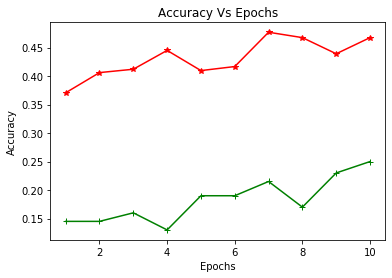

In [49]:
import matplotlib
from matplotlib import pyplot as plt
results1=results.history
training_accuracy=results1['accuracy']
val_acc=results1['val_accuracy']
epochs1=range(1,len(training_accuracy)+1)
plt.plot(epochs1,training_accuracy,label='Training Accuracy',marker="*",color='r')
plt.plot(epochs1,val_acc,label='Validation Accuracy',marker="+",color='g')
plt.title('Accuracy Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

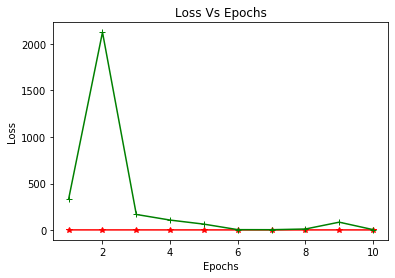

In [50]:
trainloss=results1['loss']
valloss=results1['val_loss']
epochs1=range(1,len(trainloss)+1)
plt.plot(epochs1,trainloss,label='Training Loss',marker="*",color='r')
plt.plot(epochs1,valloss,label='Validation Loss',marker="+",color='g')
plt.title('Loss Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'F1 score')

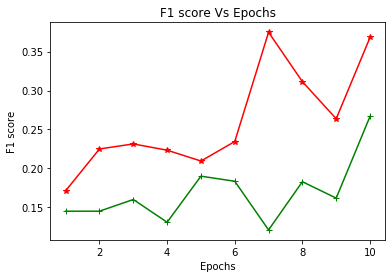

In [51]:
trainf1=results1['f1']
valf1=results1['val_f1']
epochs1=range(1,len(trainf1)+1)
plt.plot(epochs1,trainf1,label='Training F1 score',marker="*",color='r')
plt.plot(epochs1,valf1,label='Validation F1 score',marker="+",color='g')
plt.title('F1 score Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 score')